In [16]:
import os
import sys
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from scheduler.plot import Plot
from scheduler.parser import parse_arguments

In [17]:
filenames=[
    "2022-08-08_2021-10-22_carbon_latency_15_max_servers_15_timesteps_48",
    "2022-08-08_2021-10-22_latency_latency_30_max_servers_15_timesteps_48"
]   
dfs = [pd.read_csv(f"../saved/{name}.csv") for name in filenames]
dfs_grouped_by_timestep = [df.groupby("timestep") for df in dfs]

Mean latency among all regions is: 6.894699075400648


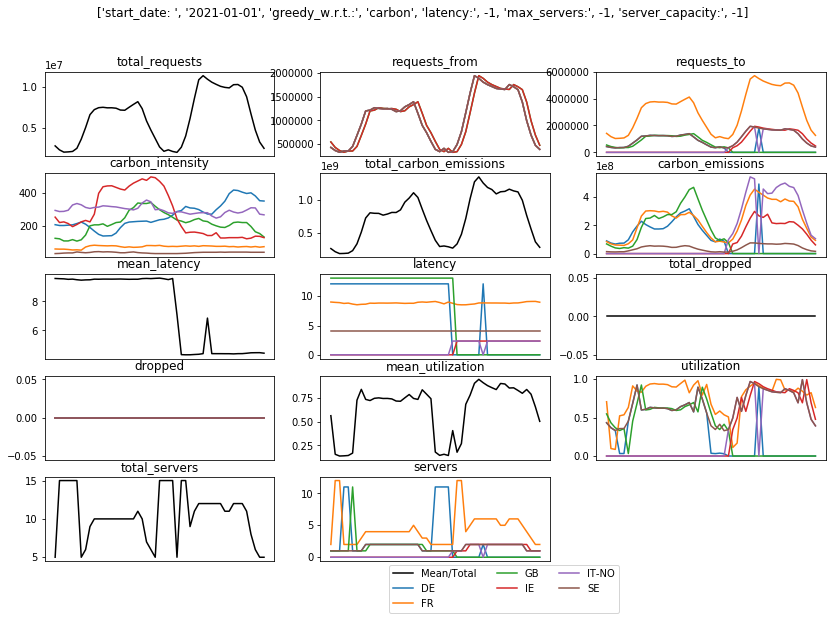

In [18]:
conf = parse_arguments(["-m", "-1", "-l", "-1", "-c", "-1", "-p", "europe", "-ty", "carbon"])
plot = Plot(conf)
plot.plot(df=dfs[0])

Mean latency among all regions is: 3.2633333333333336


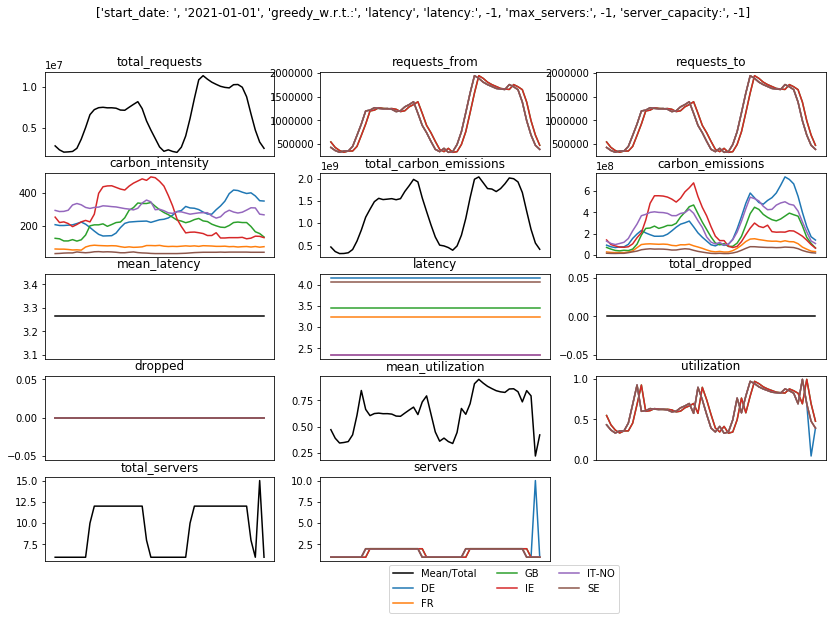

In [19]:
conf = parse_arguments(["-m", "-1", "-l", "-1", "-c", "-1", "-p", "europe", "-ty", "latency"])
plot = Plot(conf)
plot.plot(df=dfs[1])

(35634902068, 60122154042)
We saw an decrease in carbon of factor 0.40729166085589263


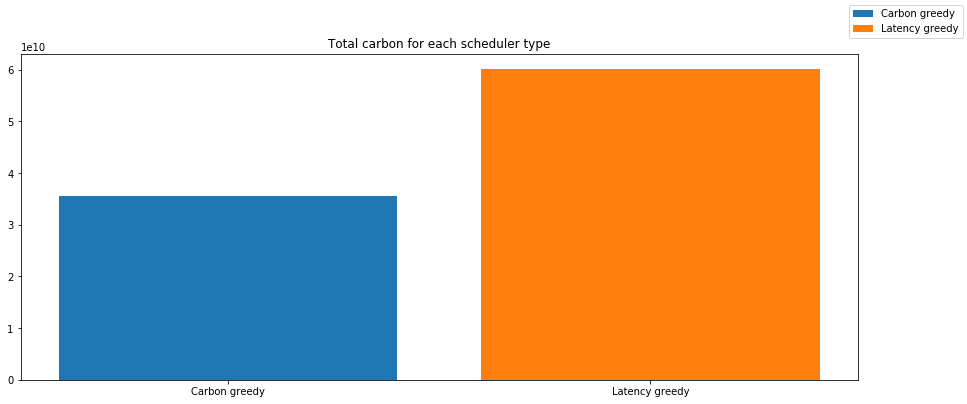

In [20]:
carbon_tuple = plot.plot_total_carbon(dfs_grouped_by_timestep, labels=["Carbon greedy", "Latency greedy"])
print(carbon_tuple)
decrease = 1 - min(carbon_tuple)/max(carbon_tuple)
print("We saw an decrease in carbon of factor " + str(decrease))